PERFORMANCE COMPAISON BETWEEN SUPPORT VECTOR MACHINES AND ANDOM FOREST FOR OLIVETTI FACES DATA CLASSIFICATION

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# load data
from sklearn.datasets import fetch_olivetti_faces

In [2]:
#assign variable called faces to data
faces = fetch_olivetti_faces()

In [3]:
type(faces) # check type od dataset

sklearn.utils.Bunch

In [4]:
#data is a dictionary so we access it with keys
faces.keys() # se keys 

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
# We check the description of our data
print(faces['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [6]:
# confim that we have 400 images each of 64x64 according to the description
faces.images.shape

(400, 64, 64)

<Figure size 432x288 with 0 Axes>

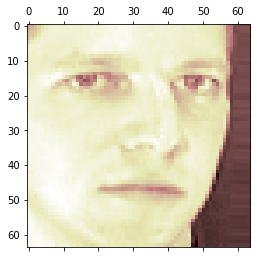

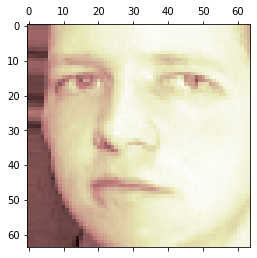

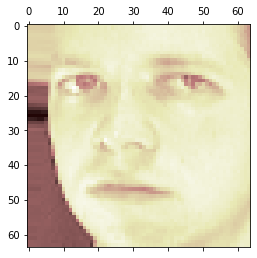

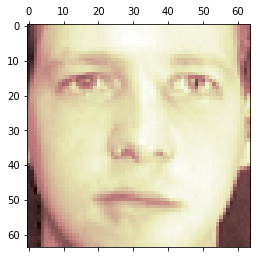

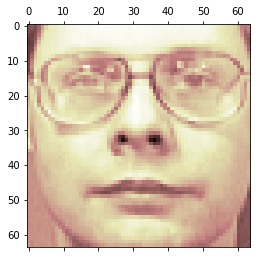

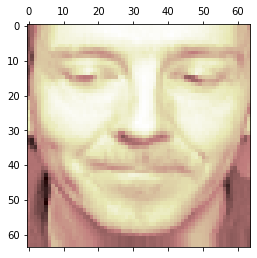

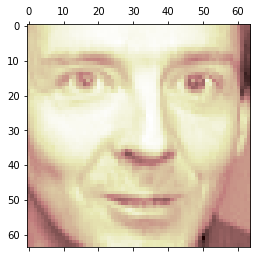

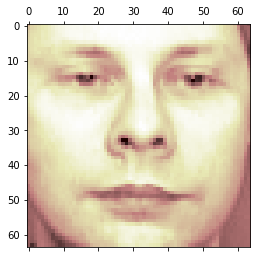

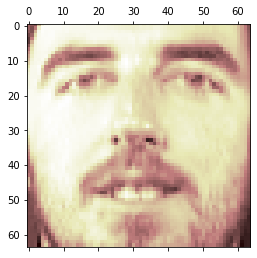

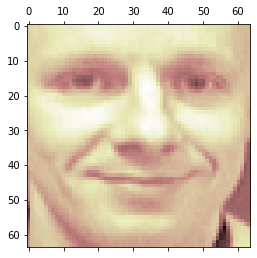

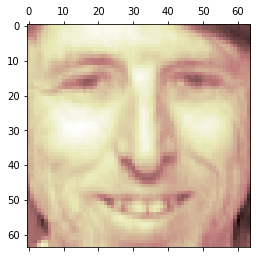

In [7]:
# print out some images
for i in [1,3,5,7,30,25,29,33,100,200,380]:
    plt.pink()
    plt.matshow(faces.images[i,:,:])

In [8]:
# check information in data
print(faces.data)
faces.data.shape

# The data contains our 400 samples, the 64x64 pixel values have been flattened to a 1x4096 matrix of pixel value.

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


(400, 4096)

In [9]:
#Lets examine the target key
print(faces.target)
faces.target.shape

#the target keys contains 400 identifiers of the 400 faces sample

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

(400,)

In [10]:
# assign variables to target and data and put in a dataframe
X = faces.data
y = faces.target

faces_df = pd.DataFrame(np.concatenate((X,y.reshape(400,1)),axis = 1))
faces_df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0.0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0.0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0.0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0.0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39.0
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39.0
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39.0
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39.0


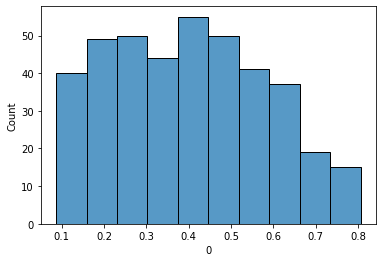

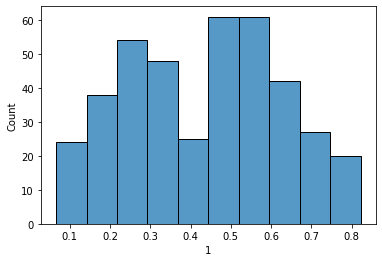

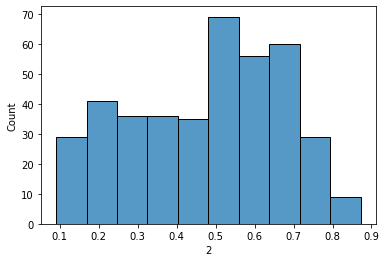

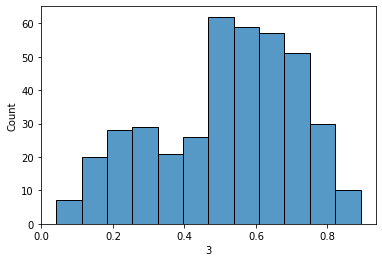

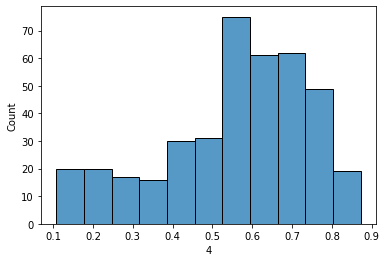

In [11]:
# Plot the distribution of some of our features
for i in range(5):
    sns.histplot(data=faces_df,x = faces_df[i])
    plt.show()

In [12]:
# We confirm that all th info in our data are filled and of the right type
faces_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, 0 to 4096
dtypes: float64(4097)
memory usage: 12.5 MB


DATA PRE-PROCESSING

In [13]:
# we split our X and y data into train and split set

from sklearn.model_selection import train_test_split
X_trainu,X_testu,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)

In [14]:
# Standardize or data using sklearn standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =scaler.fit_transform(X_trainu)
X_test = scaler.transform(X_testu)

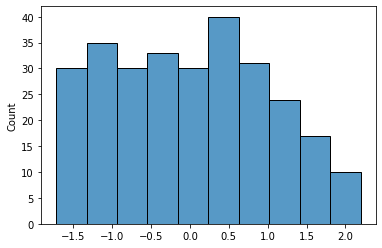

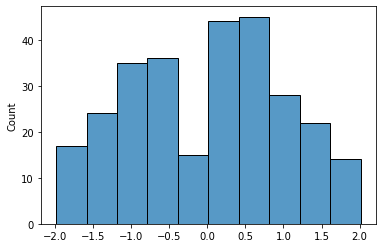

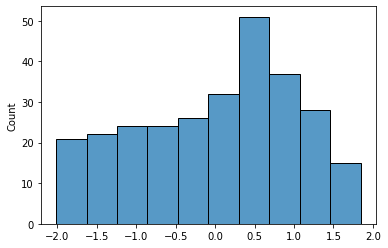

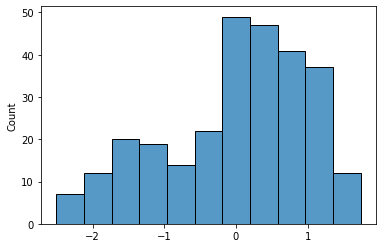

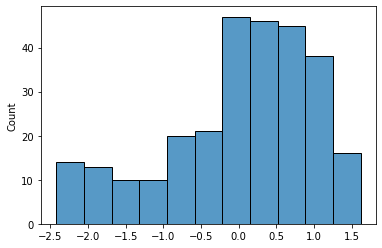

In [15]:
# Plot the distribution of some of our features to see the effect of standardization
for i in range(5):
    sns.histplot(data=X_train,x = X_train[:,i])
    plt.show()

Build SVM classifier for processed data

In [21]:
# First we build our model using the default parameters in the svm classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)


SVC()

Analyze predictions from default model

In [37]:
# we make some predictions with our model
y_train_pred1 = svc.predict(X_train)
y_test_pred1 = svc.predict(X_test)

# we calculate the classifiation accuracy and error using score.
class_acc_train = svc.score(X_train,y_train) # accuracy score for training set
class_acc_test = svc.score(X_test,y_test) # accuracy score for test set

class_err_train = 1-class_acc_train
class_err_test = 1 - class_acc_test

print('For default model (c = 1,kernel = rbf):\nclassification accuracy for train set: %.4f\nclassification error for\
    train set is: %.4f\n\nclassification accuracy for test set: %.4f\nclassification error for test set:\
    %.4f'%(class_acc_train,class_err_train,class_acc_test,class_err_test))

For default model (c = 1,kernel = rbf):
classification accuracy for train set: 1.0000
classification error for    train set is: 0.0000

classification accuracy for test set: 0.9333
classification error for test set:    0.0667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         4
           8       1.00      0.75      0.86         4
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.33      1.00      0.50         1
          16       1.00      1.00      1.00         3
          17       1.00    

<AxesSubplot:>

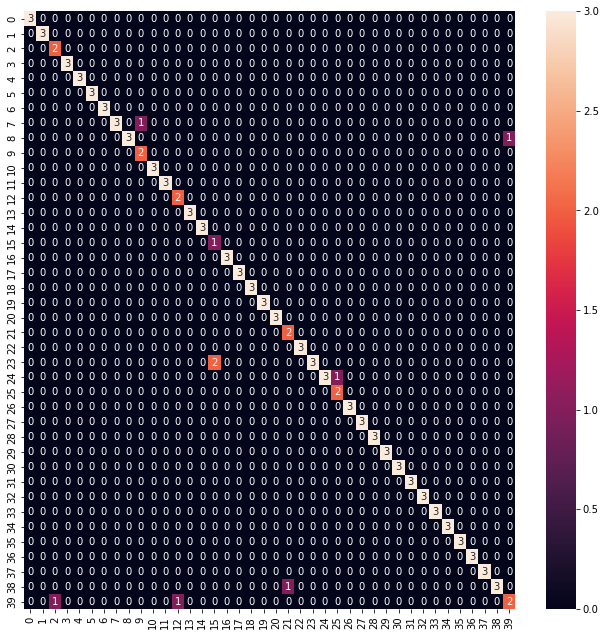

In [38]:
#import confusion matrix to view our error
from sklearn.metrics import classification_report
print(classification_report(y_test_pred1,y_test))
#classification_report(svc,y_test_pred1,y_test)

plt.figure(figsize=(11,11))
sns.heatmap(confusion_matrix(y_test_pred1,y_test), annot = True)

Model has a good accuracy with c = 1 and  RBF kernel. We try to optimize it by trying different values of c

In [39]:
# lets create and empty list to store our classification error values for differeent c values

list_train =  [] # this will contain list of classification errors for training set
list_test = [] # this will contain list of classification errors for test set

c_range = np.linspace(0.1,10,50)
for c in c_range :
    svm = SVC(C=c, kernel='rbf')
    svm.fit(X_train,y_train)
    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)
    list_train.append (1 - svm.score(X_train,y_train))
    list_test.append (1 - svm.score(X_test,y_test))


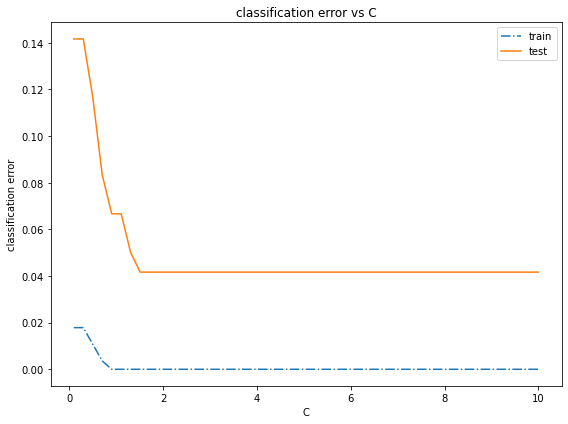

In [40]:
fig,axes = plt.subplots(1,1,figsize = (8,6))
# when p =1
axes.plot(c_range,list_train,'-.',label = 'train')
axes.plot(c_range,list_test, label = 'test')

axes.set_xlabel('C')
axes.set_ylabel('classification error')
axes.set_title('classification error vs C')
axes.legend()
plt.tight_layout()

In [41]:
# we find the exact value of the minimum classification error for test set and the corrsponding c value
min_error1 = min(list_test)
c_val1 = list_test.index(min_error1) + 1

print('for RBF Kernel, minimum classification error for test set is %.4f and c is %.1f'%(min_error1,c_val1))

for RBF Kernel, minimum classification error for test set is 0.0417 and c is 8.0


We repeat same process for Linear, and polynomial kernel

In [42]:
# lets create and empty list to store our classification error values for different c and  kernel = linear and polynomial

list1_train =  [] # this will contain list of classification errors for training set with linar kernel
list1_test = [] # this will contain list of classification errors for test set with linear kenel

list2_train = [] # this will contain list of classification errors for training set with polynomial kernel
list2_test = [] # this will contain list of classification errors for test set with polynomial kernel

c_range = np.linspace(0.01,10,50)
for kernel in ['linear', 'poly']:
    if kernel == 'linear':
        for c in c_range:
            svm1 = SVC(C=c,kernel=kernel)
            svm1.fit(X_train,y_train)
            y_pred_train = svm1.predict(X_train)
            y_pred_test = svm1.predict(X_test)
            list1_train.append (1 - svm1.score(X_train,y_train))
            list1_test.append (1 - svm1.score(X_test,y_test))
    else:
        for c in c_range:
            svm2 = SVC(C=c,kernel=kernel)
            svm2.fit(X_train,y_train)
            y_pred_train = svm2.predict(X_train)
            y_pred_test = svm2.predict(X_test)
            list2_train.append (1 - svm2.score(X_train,y_train))
            list2_test.append (1 - svm2.score(X_test,y_test))

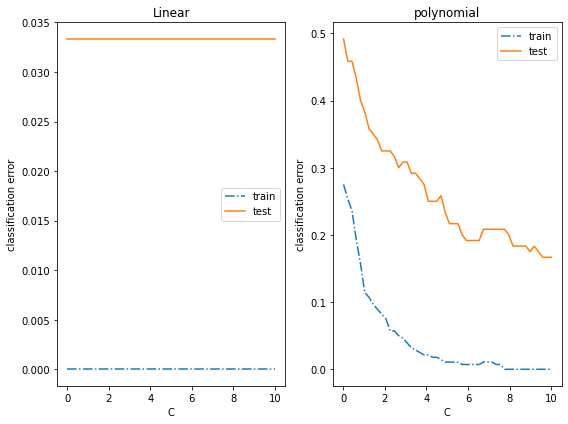

In [43]:
# we plot the classification error for linear and polynomial kernel

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when p =1
axes[0].plot(c_range,list1_train,'-.',label = 'train')
axes[0].plot(c_range,list1_test, label = 'test')

# when p = 2
axes[1].plot(c_range,list2_train,'-.',label = 'train' )
axes[1].plot(c_range,list2_test,label = 'test')

axes[0].set_xlabel('C')
axes[0].set_ylabel('classification error')
axes[0].set_title('Linear')
axes[0].legend()

axes[1].set_xlabel('C')
axes[1].set_ylabel('classification error')
axes[1].set_title('polynomial')
axes[1].legend()
plt.tight_layout()

In [44]:
# we find the exact value of the minimum classification error for test set and the corrsponding C for linear and polynomial

# for linear 

min_error1 = min(list1_test)
c_val1 = list1_test.index(min_error1) + 1

#for polynomial
min_error2 = min(list2_test)
c_val2 = list2_test.index(min_error2)+1

print('For linear, minimum classification error is %.4f and c is %.1f'%(min_error1,c_val1))
print('\nFor polynomial, minimum classification error is %.4f and c is %.1f'%(min_error2,c_val2))

For linear, minimum classification error is 0.0333 and c is 1.0

For polynomial, minimum classification error is 0.1667 and c is 48.0


We can see that linear SVC did better than than polynomial SVC and RBF. To further find the better optimum SVC, we use a grid search 

In [20]:
# we implement a gridsearch for deifferent C values and kernel type to find model with the best accuracy.\
#  We have a balanced dataset so accuracy is a good perfromance test.
svc = SVC()
c_range = np.linspace(0.5,100,200)
parameters = [
    {'kernel':['linear'],'C':c_range},
    {'kernel':['poly'],'C':c_range},
    {'kernel':['rbf'],'C':c_range}
]
clf = GridSearchCV(estimator = svc,param_grid=parameters,scoring='accuracy',cv= 3,verbose=1)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,...
        63.5,  64. ,  64.5,  65. ,  65.5,  66. ,  66.5,  67. ,  67.5,
        68. ,  68.5,  69. ,  69.5,  70. ,  70.5,  71. ,  71.5,  72. ,
        72.5,  73. ,  73.5,  74. ,  74.5,  75. ,  75.5,  76. ,  76.5,
        77. ,  77.5,  78. ,  78.5,  79. ,  79.5,  80. ,  80.5,  81. ,
        81.5,  82. ,  82.5,  83. ,  83.5,  84. ,  84.5,  85. ,  85.5,
        86. ,  86.5,  87. ,  87.5,  88. ,

In [27]:
# check best parameters for our model from gridsearch
kernel = clf.best_params_['kernel']
C_val = clf.best_params_['C']
best_accuracy = clf.score(X_test,y_test)
least_error = 1 - best_accuracy

print(f'Best SVC model for our data is a {kernel}\
 kernel with \nc = {C_val}\nmodel accuarcy = {best_accuracy}\n\
classification error = {least_error}')

Best SVC model for our data is a linear kernel with 
c = 0.5
model accuarcy = 0.9666666666666667
classification error = 0.033333333333333326


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         3
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.33      1.00      0.50         1
          16       1.00      1.00      1.00         3
          17       1.00    

<AxesSubplot:>

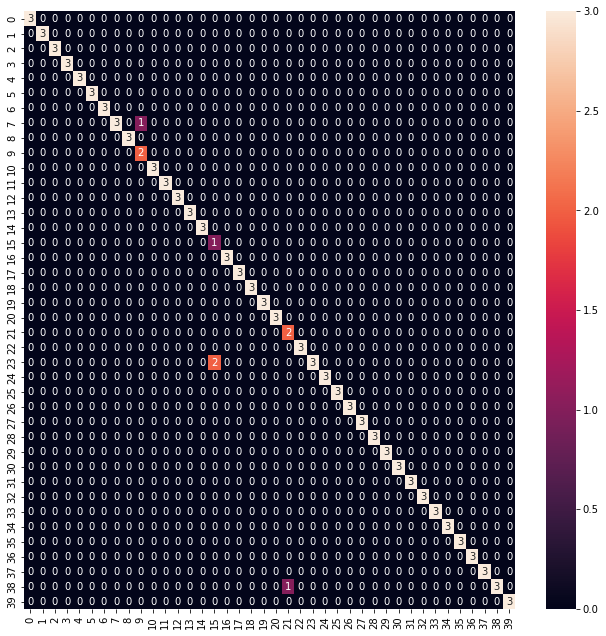

In [28]:
y_pred_test = clf.predict(X_test)

print(classification_report(y_pred_test,y_test))

#view the classification_report and confusion matrix
plt.figure(figsize=(11,11))
sns.heatmap(confusion_matrix(y_pred_test,y_test), annot = True)

RANDOM FORESTS CLASSIFIER FOR FACES CLASSIFICATION

In [48]:
#We apply random forest to our dataset in this section and compare performance to SVC

#import our randomforest classifier from sklearn ensemble methods ad build a model using default parameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

We examine model performance with default parameeters

In [49]:
# we make some predictions with our model
y_train_pred1 = rfc.predict(X_train)
y_test_pred1 = rfc.predict(X_test)

# we calculate the classifiation accuracy and error using score.
class_acc_train = rfc.score(X_train,y_train) # accuracy score for training set
class_acc_test = rfc.score(X_test,y_test) # accuracy score for test set

class_err_train = 1-class_acc_train
class_err_test = 1 - class_acc_test

print('For default parameter (n_estimators=100,criterion="gini", max_depth=None):\nclassification accuracy for train set: %.4f\nclassification error for\
    train set is: %.4f\n\nclassification accuracy for test set: %.4f\nclassification error for test set:\
    %.4f'%(class_acc_train,class_err_train,class_acc_test,class_err_test))

For default parameter (n_estimators=100,criterion="gini", max_depth=None):
classification accuracy for train set: 1.0000
classification error for    train set is: 0.0000

classification accuracy for test set: 0.9500
classification error for test set:    0.0500


For this model parameters (100 trees, gini criterion and pure leaf nodes i.e tree goes deep unitil each leave nodes are pure), the train accuracy is 100% and test accuracy is 95%. Though this is a good model, it might be an overfitted model as indicated by a 100% train accuracy. We try some hyperparameters tuning to increase our test accuracy.

We compare the performance of differet parameters in the order below:

1. Gini vs Entropy for 1 - 100 trees and 'sqrt' feature splitting.
2. Gini vs Entropy for 1 - 100 trees and 'log2' feature splitting.
3. Gini vs Entropy for 1 - 100 trees and no featue splitting.

In [50]:
# 1. Gini vs Entropy for 1 - 100 trees and 'sqrt' feature splitting.

list1_trainc =  [] # this will contain list of train set classification errors for different no of trees and gini criterion
list1_testc = [] # this will contain list of test set classification errors for different no of trees and gini criterion

list2_trainc = [] # this will contain list of train set classification errors for different no of trees and entropy criterion
list2_testc = [] # this will contain list of test set classification errors for different no of trees and entropy criterion

tree_range = np.arange(1,100,1)
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='gini',max_features="sqrt",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list1_trainc.append (1 - clf.score(X_train,y_train))
    list1_testc.append (1 - clf.score(X_test,y_test))
    
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='entropy',max_features="sqrt",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list2_trainc.append (1 - clf.score(X_train,y_train))
    list2_testc.append (1 - clf.score(X_test,y_test))

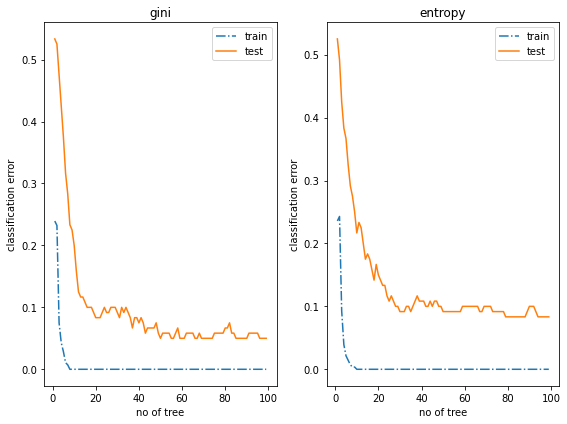

In [51]:
# we plot the classification error for gini and entropy 

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when criterion = 'gini'
axes[0].plot(tree_range,list1_trainc,'-.',label = 'train')
axes[0].plot(tree_range,list1_testc, label = 'test')

# when criterion = 'entropy'
axes[1].plot(tree_range,list2_trainc,'-.',label = 'train' )
axes[1].plot(tree_range,list2_testc,label = 'test')

axes[0].set_xlabel('no of tree')
axes[0].set_ylabel('classification error')
axes[0].set_title('gini')
axes[0].legend()

axes[1].set_xlabel('no of tree')
axes[1].set_ylabel('classification error')
axes[1].set_title('entropy')
axes[1].legend()
plt.tight_layout()

In [52]:
# we find the exact value of the minimum classification error for test set and the corrsponding no of trees

# for gini

min_error1c = min(list1_testc)
no_tree1 = list1_testc.index(min_error1c) + 1

#for entropy
min_error2c = min(list2_testc)
no_tree2 = list2_testc.index(min_error2c)+1

print("For gini criterion and 'sqrt' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error1c,no_tree1))
print("\nFor entropy criterion and 'sqrt' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error2c,no_tree2))

For gini criterion and 'sqrt' spliting, minimum classification error = 0.0500, and no of trees = 50

For entropy criterion and 'sqrt' spliting, minimum classification error = 0.0833, and no of trees = 79


In [53]:
# 2. Gini vs Entropy for 1 - 100 trees and 'log2' feature splitting.

list1_trainc =  [] # this will contain list of train set classification errors for different no of trees and gini criterion
list1_testc = [] # this will contain list of test set classification errors for different no of trees and gini criterion

list2_trainc = [] # this will contain list of train set classification errors for different no of trees and entropy criterion
list2_testc = [] # this will contain list of test set classification errors for different no of trees and entropy criterion

tree_range = np.arange(1,100,1)
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='gini',max_features="log2",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list1_trainc.append (1 - clf.score(X_train,y_train))
    list1_testc.append (1 - clf.score(X_test,y_test))
    
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='entropy',max_features="log2",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list2_trainc.append (1 - clf.score(X_train,y_train))
    list2_testc.append (1 - clf.score(X_test,y_test))

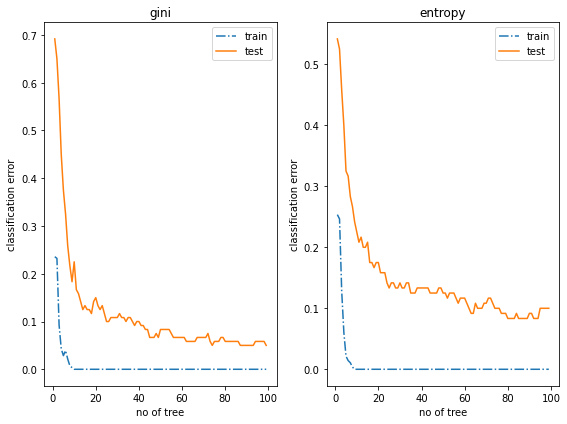

In [54]:
# we plot the classification error for gini and entropy 

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when criterion = 'gini'
axes[0].plot(tree_range,list1_trainc,'-.',label = 'train')
axes[0].plot(tree_range,list1_testc, label = 'test')

# when criterion = 'entropy'
axes[1].plot(tree_range,list2_trainc,'-.',label = 'train' )
axes[1].plot(tree_range,list2_testc,label = 'test')

axes[0].set_xlabel('no of tree')
axes[0].set_ylabel('classification error')
axes[0].set_title('gini')
axes[0].legend()

axes[1].set_xlabel('no of tree')
axes[1].set_ylabel('classification error')
axes[1].set_title('entropy')
axes[1].legend()
plt.tight_layout()

In [55]:
# we find the exact value of the minimum classification error for test set and the corrsponding no of trees

# for gini

min_error1c = min(list1_testc)
no_tree1 = list1_testc.index(min_error1c) + 1

#for entropy
min_error2c = min(list2_testc)
no_tree2 = list2_testc.index(min_error2c)+1

print("For gini criterion and 'log2' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error1c,no_tree1))
print("\nFor entropy criterion and 'log2' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error2c,no_tree2))

For gini criterion and 'log2' spliting, minimum classification error = 0.0500, and no of trees = 74

For entropy criterion and 'log2' spliting, minimum classification error = 0.0833, and no of trees = 80


In [23]:
#3. Gini vs Entropy for 1 - 100 trees and no feature splitting.

list1_trainc =  [] # this will contain list of train set classification errors for different no of trees and gini criterion
list1_testc = [] # this will contain list of test set classification errors for different no of trees and gini criterion

list2_trainc = [] # this will contain list of train set classification errors for different no of trees and entropy criterion
list2_testc = [] # this will contain list of test set classification errors for different no of trees and entropy criterion

tree_range = np.arange(1,100,1)
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='gini',max_features=None,random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list1_trainc.append (1 - clf.score(X_train,y_train))
    list1_testc.append (1 - clf.score(X_test,y_test))
    
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='entropy',max_features=None,random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list2_trainc.append (1 - clf.score(X_train,y_train))
    list2_testc.append (1 - clf.score(X_test,y_test))

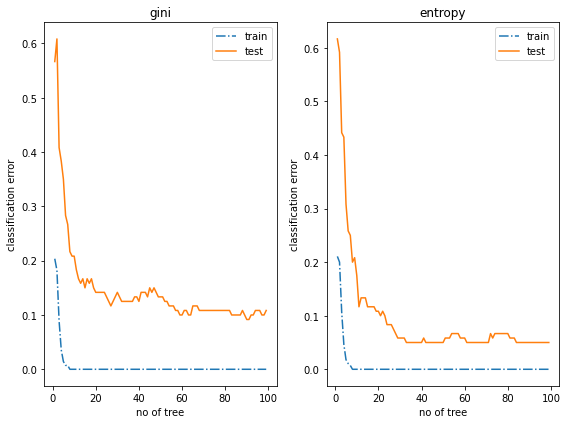

In [24]:
# we plot the classification error for gini and entropy 

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when criterion = 'gini'
axes[0].plot(tree_range,list1_trainc,'-.',label = 'train')
axes[0].plot(tree_range,list1_testc, label = 'test')

# when criterion = 'entropy'
axes[1].plot(tree_range,list2_trainc,'-.',label = 'train' )
axes[1].plot(tree_range,list2_testc,label = 'test')

axes[0].set_xlabel('no of tree')
axes[0].set_ylabel('classification error')
axes[0].set_title('gini')
axes[0].legend()

axes[1].set_xlabel('no of tree')
axes[1].set_ylabel('classification error')
axes[1].set_title('entropy')
axes[1].legend()
plt.tight_layout()

In [25]:
# we find the exact value of the minimum classification error for test set and the corrsponding no of trees

# for gini

min_error1c = min(list1_testc)
no_tree1 = list1_testc.index(min_error1c) + 1

#for entropy
min_error2c = min(list2_testc)
no_tree2 = list2_testc.index(min_error2c)+1

print("For gini criterion and 'no' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error1c,no_tree1))
print("\nFor entropy criterion and no spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error2c,no_tree2))

For gini criterion and 'no' spliting, minimum classification error = 0.0917, and no of trees = 90

For entropy criterion and no spliting, minimum classification error = 0.0500, and no of trees = 33


The maximum accuracy obtained is 95% and this partains to gini criterion and 'sqrt' feature splitting.

PIXEL IMPORTANCE BASED ON MEAN DECREASE IN IMPURITY

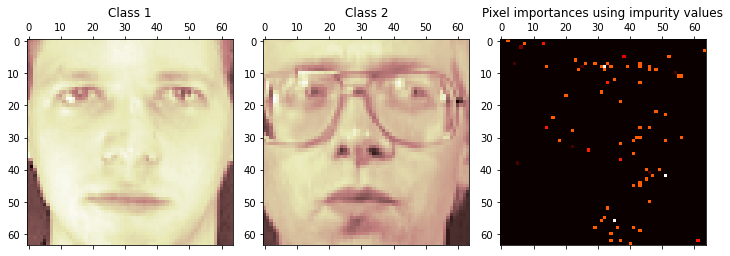

In [23]:
# re-build our random forest classifier with the best parameters
fig,axes = plt.subplots(1,3, figsize = (10,10))
rfc = RandomForestClassifier(n_estimators=72, max_features= 'log2')

#pixel importance based on 2 class of faces

rfc.fit(X[:20,:],y[:20])
img_shape = faces.images[0].shape

image_1 = X[0,:].reshape(img_shape)
image_2 = X[12,:].reshape(img_shape)

importances = rfc.feature_importances_.reshape(img_shape)
axes[0].matshow(image_1)
axes[0].set_title('Class 1')
axes[1].matshow(image_2)
axes[1].set_title('Class 2')
axes[2].matshow(importances, cmap=plt.cm.hot)
axes[2].set_title("Pixel importances using impurity values")
plt.tight_layout()



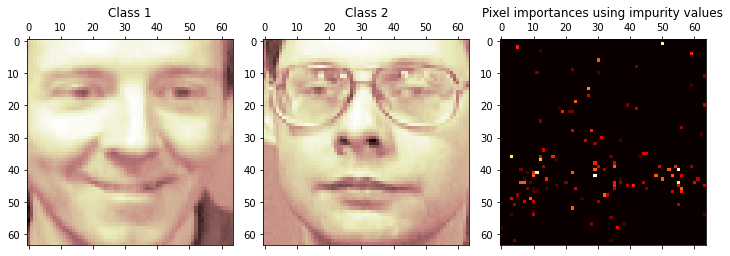

In [24]:
# re-build our random forest classifier with the best parameters
fig,axes = plt.subplots(1,3, figsize = (10,10))
rfc = RandomForestClassifier(n_estimators=72, max_features= 'log2',random_state=123)

#pixel importance based on another 2 classes of faces
rfc.fit(X[20:40,:],y[20:40])
img_shape = faces.images[0].shape

image_1 = X[20,:].reshape(img_shape)
image_2 = X[32,:].reshape(img_shape)

importances = rfc.feature_importances_.reshape(img_shape)
axes[0].matshow(image_1)
axes[0].set_title('Class 1')
axes[1].matshow(image_2)
axes[1].set_title('Class 2')
axes[2].matshow(importances, cmap=plt.cm.hot)
axes[2].set_title("Pixel importances using impurity values")
plt.tight_layout()



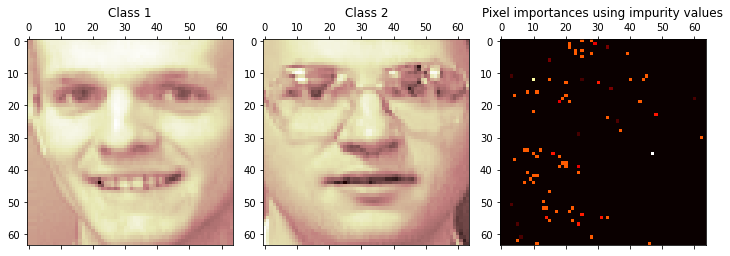

In [25]:
fig,axes = plt.subplots(1,3, figsize = (10,10))
rfc = RandomForestClassifier(n_estimators=72, max_features= 'log2')
rfc.fit(X[40:60,:],y[40:60])
img_shape = faces.images[0].shape

image_1 = X[40,:].reshape(img_shape)
image_2 = X[52,:].reshape(img_shape)

importances = rfc.feature_importances_.reshape(img_shape)
axes[0].matshow(image_1)
axes[0].set_title('Class 1')
axes[1].matshow(image_2)
axes[1].set_title('Class 2')
axes[2].matshow(importances, cmap=plt.cm.hot)
axes[2].set_title("Pixel importances using impurity values")
plt.tight_layout()

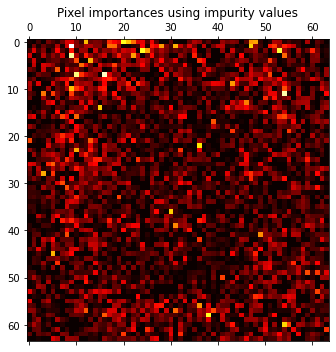

In [26]:
# Overall pixel Importance for all faces

fig,axes = plt.subplots(1,1, figsize = (5,5))
rfc = RandomForestClassifier(n_estimators=72, max_features= 'log2')
rfc.fit(X_train,y_train)
img_shape = faces.images[0].shape

importances = rfc.feature_importances_.reshape(img_shape)
axes.matshow(importances, cmap=plt.cm.hot)
axes.set_title("Pixel importances using impurity values")
plt.tight_layout()